In [283]:
import pandas as pd
pd.set_option('max_colwidth', 100)
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
import scipy.stats as st

In [ ]:
# Data - ABCD
# reporter - parent
# Hypothesis - Hyp2a (depressed vs another form of psychopathology (ADHD/anxiety))

In [284]:
path_to_ksads = '/data/ABCD_MBDU/release3-tabulated-data/abcd_ksad01.txt'
path_to_cbcl = '/data/ABCD_MBDU/release3-tabulated-data/abcd_cbcls01.txt'
Hypothesis = '2a'

# Import data

## ksads

In [285]:
ksads_data = pd.read_csv(path_to_ksads, sep='\t', header=0, low_memory=False)
ksads_data.head()

,collection_id,abcd_ksad01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,ksads_import_id_p,...,ksads_25_316_p,ksads_25_317_p,ksads_25_32_p,ksads_25_33_p,ksads_25_318_p,ksads_25_319_p,ksads_timestamp_p,ksads_duration_p,collection_title,study_cohort_name
0,collection_id,abcd_ksad01_id,dataset_id,The NDAR Global Unique Identifier (GUID) for research subject,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampling/imaging/biospecimen was completed. MM/DD/YYYY,Age in months at the time of the interview/test/sampling/imaging.,Sex of the subject,The event name for which the data was collected,Unique ID provided by KSADS for dataset,...,Symptom - Impairment in functioning due to selective mutism Present,Symptom - Impairment in functioning due to selective mutism Past,Symptom - Failure to speak in social situations Present,Symptom - Failure to speak in social situations Past,Symptom - Duration at least month for selective mutism Present,Symptom - Duration at least month for selective mutism Past,Starting timestamp for the survey,Time duration for the survey,collection_title,study_cohort_name
1,2573,160449,34613,NDAR_INV003RTV85,NDAR_INV003RTV85,09/16/2019,143,F,1_year_follow_up_y_arm_1,NDAR_INV003RTV85_1yearfollowupyarm1_01,...,555,555,555,555,555,555,02-14-2019 01:49,308090,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
2,2573,160452,34613,NDAR_INV005V6D2C,NDAR_INV005V6D2C,04/22/2018,121,F,baseline_year_1_arm_1,NDAR_INV005V6D2C_baselineyear1arm1_01,...,555,555,555,555,555,555,04-22-2018 04:33,492,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
3,2573,160491,34613,NDAR_INV019DXLU4,NDAR_INV019DXLU4,03/20/2017,132,F,baseline_year_1_arm_1,555,...,555,555,555,555,555,555,03-20-2017 01:00,719,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
4,2573,160461,34613,NDAR_INV00HEV6HB,NDAR_INV00HEV6HB,07/08/2017,124,M,baseline_year_1_arm_1,555,...,555,555,555,555,555,555,07-08-2017 11:00,44,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


In [286]:
long_names = ksads_data.loc[0].to_dict()
ksads_data = ksads_data.drop(0)

ksads_data_bsl = ksads_data.loc[ksads_data.eventname == 'baseline_year_1_arm_1'].copy()
#bsl_dat = ksads_dat.loc[ksads_dat.eventname == '2_year_follow_up_y_arm_1'].copy()
ksads_data_bsl.head()

,collection_id,abcd_ksad01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,ksads_import_id_p,...,ksads_25_316_p,ksads_25_317_p,ksads_25_32_p,ksads_25_33_p,ksads_25_318_p,ksads_25_319_p,ksads_timestamp_p,ksads_duration_p,collection_title,study_cohort_name
2,2573,160452,34613,NDAR_INV005V6D2C,NDAR_INV005V6D2C,04/22/2018,121,F,baseline_year_1_arm_1,NDAR_INV005V6D2C_baselineyear1arm1_01,...,555,555,555,555,555,555,04-22-2018 04:33,492,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
3,2573,160491,34613,NDAR_INV019DXLU4,NDAR_INV019DXLU4,03/20/2017,132,F,baseline_year_1_arm_1,555,...,555,555,555,555,555,555,03-20-2017 01:00,719,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
4,2573,160461,34613,NDAR_INV00HEV6HB,NDAR_INV00HEV6HB,07/08/2017,124,M,baseline_year_1_arm_1,555,...,555,555,555,555,555,555,07-08-2017 11:00,44,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
5,2573,160463,34613,NDAR_INV00J52GPG,NDAR_INV00J52GPG,09/05/2018,110,M,baseline_year_1_arm_1,NDAR_INV00J52GPG_baselineyear1arm1_01,...,555,555,555,555,555,555,09-05-2018 03:45,56,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
9,2573,160501,34613,NDAR_INV01EN91PG,NDAR_INV01EN91PG,04/19/2017,113,F,baseline_year_1_arm_1,555,...,555,555,555,555,555,555,04-19-2017 02:39,30,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


### Only leave columns with depression, adhd and anxiety

In [287]:
# column names - depression
# only MDD, current and in partial remission
# Persistent Depressive Disorder (Dysthymia), current and in partial remission
# Unspecified Depressive Disorder, Current

depression_column_list = [f'ksads_1_{x}_p' for x in [840, 841, 843, 844, 846]]

# column names - adhd
adhd_column_list = ['ksads_14_856_p', 'ksads_14_855_p', 'ksads_14_853_p']

# column names - anxiety
anxiety_column_list = [ 'ksads_5_906_p',  'ksads_5_857_p', 'ksads_6_908_p',  'ksads_7_861_p',  'ksads_7_909_p',  'ksads_8_863_p',  'ksads_8_911_p', 'ksads_10_913_p', 'ksads_10_869_p', 'ksads_9_867_p']
# all_disorders
col_list = ['src_subject_id']
col_list += depression_column_list
col_list += adhd_column_list
col_list += anxiety_column_list

col_list

anxiety_or_adhd_column_list = anxiety_column_list + adhd_column_list


In [288]:
ksads_bsl_id_depanxadhd = ksads_data_bsl.loc[:, col_list]
ksads_bsl_id_depanxadhd.head()

,src_subject_id,ksads_1_840_p,ksads_1_841_p,ksads_1_843_p,ksads_1_844_p,ksads_1_846_p,ksads_14_856_p,ksads_14_855_p,ksads_14_853_p,ksads_5_906_p,ksads_5_857_p,ksads_6_908_p,ksads_7_861_p,ksads_7_909_p,ksads_8_863_p,ksads_8_911_p,ksads_10_913_p,ksads_10_869_p,ksads_9_867_p
2,NDAR_INV005V6D2C,0,0,0,0,0,0,0,0,0,0,555,0,0,0,0,0,0,0
3,NDAR_INV019DXLU4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,NDAR_INV00HEV6HB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,NDAR_INV00J52GPG,0,0,0,0,0,0,0,0,0,0,555,0,0,0,0,0,0,0
9,NDAR_INV01EN91PG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [289]:
# use src_subject_id as index
ksads_bsl_id_depanxadhd = ksads_bsl_id_depanxadhd.set_index('src_subject_id')
ksads_bsl_id_depanxadhd.head()

,ksads_1_840_p,ksads_1_841_p,ksads_1_843_p,ksads_1_844_p,ksads_1_846_p,ksads_14_856_p,ksads_14_855_p,ksads_14_853_p,ksads_5_906_p,ksads_5_857_p,ksads_6_908_p,ksads_7_861_p,ksads_7_909_p,ksads_8_863_p,ksads_8_911_p,ksads_10_913_p,ksads_10_869_p,ksads_9_867_p
src_subject_id,,,,,,,,,,,,,,,,,,
NDAR_INV005V6D2C,0,0,0,0,0,0,0,0,0,0,555,0,0,0,0,0,0,0
NDAR_INV019DXLU4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
NDAR_INV00HEV6HB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NDAR_INV00J52GPG,0,0,0,0,0,0,0,0,0,0,555,0,0,0,0,0,0,0
NDAR_INV01EN91PG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [290]:
# Removing missing data
# missing data (nans) are encoded as 555 or 888.
# Basically, ksads is a binary measure, so everything with value >1 is not right
# We are encoding all those cells as NaN and removing them

ksads_bsl_id_depanxadhd = ksads_bsl_id_depanxadhd.astype(int)
ksads_bsl_id_depanxadhd[ksads_bsl_id_depanxadhd > 1] = np.nan
ksads_bsl_id_depanxadhd['any_depression'] = (ksads_bsl_id_depanxadhd.loc[:, depression_column_list] > 0).sum(1) > 0
ksads_bsl_id_depanxadhd['anxadhd_null'] = ksads_bsl_id_depanxadhd.loc[:, adhd_column_list + anxiety_column_list].isnull().sum(1) > 0
ksads_bsl_id_depanxadhd['good'] = ksads_bsl_id_depanxadhd.any_depression | (~ksads_bsl_id_depanxadhd.anxadhd_null)

bad_ids = ksads_bsl_id_depanxadhd.loc[~ksads_bsl_id_depanxadhd.good].index
good_ids = ksads_bsl_id_depanxadhd.loc[ksads_bsl_id_depanxadhd.good].index

# only in this specific situation, since we don't care about comorbidities of depression for this hypothesis, we'll set nans to 0
ksads_bsl_id_depanxadhd.loc[ksads_bsl_id_depanxadhd.good & ksads_bsl_id_depanxadhd.any_depression & ksads_bsl_id_depanxadhd.anxadhd_null, 'ksads_6_908_p'] = 0

In [291]:
check1 = (ksads_bsl_id_depanxadhd.loc[:, depression_column_list].sum(1) > 0).astype(int)
check1.sum()

54

In [292]:
ksads_dat = (ksads_bsl_id_depanxadhd.loc[good_ids, depression_column_list].sum(1) > 0).astype(int)
ksads_dat.head()
type(ksads_dat)
print(ksads_dat.sum())
ksads_dat.to_frame()
ksads_dat.value_counts()

54


0    6249
1      54
dtype: int64

In [293]:
ksads_dat = pd.DataFrame(ksads_dat).rename(columns={0:'ksads_DEPRESSION'})
ksads_dat['ksads_ANXIETY'] = (ksads_bsl_id_depanxadhd.loc[good_ids, anxiety_column_list].sum(1) > 0).astype(int)
ksads_dat['ksads_ADHD'] = (ksads_bsl_id_depanxadhd.loc[good_ids, adhd_column_list].sum(1) > 0).astype(int)
ksads_dat['ksads_ADHD_OR_ANXIETY'] = (ksads_bsl_id_depanxadhd.loc[good_ids, anxiety_or_adhd_column_list].sum(1) > 0).astype(int)

In [294]:
ksads_dat.head()
ksads_dat['ksads_DEPRESSION'].value_counts()

0    6249
1      54
Name: ksads_DEPRESSION, dtype: int64

In [301]:
ksads_dat.head()

,ksads_DEPRESSION,ksads_ANXIETY,ksads_ADHD,ksads_ADHD_OR_ANXIETY
src_subject_id,,,,
NDAR_INV019DXLU4,0,0,1,1
NDAR_INV00HEV6HB,0,0,0,0
NDAR_INV01EN91PG,0,0,0,0
NDAR_INV028D3ELL,0,0,0,0
NDAR_INV02RCED7D,0,0,0,0


In [302]:
ksads_dat['ksads_DEPRESSION'].value_counts()

0    6249
1      54
Name: ksads_DEPRESSION, dtype: int64

In [303]:
DEPyes_ANXADHDno = []
DEPno_ANXADHDyes = []

for index, row in ksads_dat.iterrows():
    if row['ksads_DEPRESSION'] == 1 and row['ksads_ADHD_OR_ANXIETY'] == 0:
        DEPyes_ANXADHDno.append(1)
    else:
        DEPyes_ANXADHDno.append(0)
        
    if row['ksads_DEPRESSION'] == 0 and row['ksads_ADHD_OR_ANXIETY'] == 1:
        DEPno_ANXADHDyes.append(1)
    else:
        DEPno_ANXADHDyes.append(0)

print(sum(DEPyes_ANXADHDno))
print(sum(DEPno_ANXADHDyes))

ksads_dat['ksads_DEPyes_ANXADHDno'] = DEPyes_ANXADHDno
ksads_dat['ksads_DEPno_ANXADHDyes'] = DEPno_ANXADHDyes
print(ksads_dat.head())

13
1144
                  ksads_DEPRESSION  ksads_ANXIETY  ksads_ADHD  \
src_subject_id                                                  
NDAR_INV019DXLU4                 0              0           1   
NDAR_INV00HEV6HB                 0              0           0   
NDAR_INV01EN91PG                 0              0           0   
NDAR_INV028D3ELL                 0              0           0   
NDAR_INV02RCED7D                 0              0           0   

                  ksads_ADHD_OR_ANXIETY  ksads_DEPyes_ANXADHDno  \
src_subject_id                                                    
NDAR_INV019DXLU4                      1                       0   
NDAR_INV00HEV6HB                      0                       0   
NDAR_INV01EN91PG                      0                       0   
NDAR_INV028D3ELL                      0                       0   
NDAR_INV02RCED7D                      0                       0   

                  ksads_DEPno_ANXADHDyes  
src_subject_id         

### end of creating the clean ksads dataframe

## Load cbcl

In [304]:
cbcl_data = pd.read_csv(path_to_cbcl, sep='\t', header=0, low_memory=False)
cbcl_data.head()

,collection_id,abcd_cbcls01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,cbcl_scr_syn_anxdep_r,...,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,collection_title,study_cohort_name
0,collection_id,abcd_cbcls01_id,dataset_id,The NDAR Global Unique Identifier (GUID) for research subject,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampling/imaging/biospecimen was completed. MM/DD/YYYY,Age in months at the time of the interview/test/sampling/imaging.,Sex of the subject,The event name for which the data was collected,AnxDep CBCL Syndrome Scale (raw score),...,Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (raw score),Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (t-score),Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (missing values),Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (number of missing values),Stress CBCL Scale2007 Scale (raw score),Stress CBCL Scale2007 Scale (t-score),Stress CBCL Scale2007 Scale (missing values),Stress CBCL Scale2007 Scale (number of missing values),collection_title,study_cohort_name
1,2573,76906,34967,NDAR_INV003RTV85,NDAR_INV003RTV85,10/01/2018,131,F,baseline_year_1_arm_1,0,...,0,50,NaN,0,0,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
2,2573,76922,34967,NDAR_INV00LH735Y,NDAR_INV00LH735Y,01/29/2018,109,M,baseline_year_1_arm_1,0,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
3,2573,76930,34967,NDAR_INV00U4FTRU,NDAR_INV00U4FTRU,05/11/2019,141,F,1_year_follow_up_y_arm_1,10,...,8,76,NaN,0,18,81,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
4,2573,76932,34967,NDAR_INV00UMK5VC,NDAR_INV00UMK5VC,09/25/2019,132,F,1_year_follow_up_y_arm_1,1,...,0,50,NaN,0,4,54,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


In [305]:
cbcl_data = cbcl_data.drop(0)

cbcl_data_bsl = cbcl_data.loc[cbcl_data.eventname == 'baseline_year_1_arm_1'].copy()
cbcl_data_bsl.head()

,collection_id,abcd_cbcls01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,cbcl_scr_syn_anxdep_r,...,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,collection_title,study_cohort_name
1,2573,76906,34967,NDAR_INV003RTV85,NDAR_INV003RTV85,10/01/2018,131,F,baseline_year_1_arm_1,0,...,0,50,NaN,0,0,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
2,2573,76922,34967,NDAR_INV00LH735Y,NDAR_INV00LH735Y,01/29/2018,109,M,baseline_year_1_arm_1,0,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
6,2573,76960,34967,NDAR_INV01NAYMZH,NDAR_INV01NAYMZH,08/09/2017,129,M,baseline_year_1_arm_1,0,...,1,51,NaN,0,2,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
10,2573,77005,34967,NDAR_INV030W95VP,NDAR_INV030W95VP,03/11/2017,128,F,baseline_year_1_arm_1,1,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
13,2573,77023,34967,NDAR_INV03NW0RKL,NDAR_INV03NW0RKL,04/17/2017,119,F,baseline_year_1_arm_1,0,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


### cbcl - only leave columns with name id and DSM depression diagnosis

In [306]:
col_list_cbcl = ['src_subject_id', 'cbcl_scr_dsm5_depress_t']
cbcl_bsl_id_dep = cbcl_data_bsl.loc[:, col_list_cbcl]
cbcl_bsl_id_dep = cbcl_bsl_id_dep.set_index('src_subject_id')
cbcl_bsl_id_dep.head(20)

,cbcl_scr_dsm5_depress_t
src_subject_id,
NDAR_INV003RTV85,50
NDAR_INV00LH735Y,50
NDAR_INV01NAYMZH,50
NDAR_INV030W95VP,50
NDAR_INV03NW0RKL,50
NDAR_INV04YC4RXD,50
NDAR_INV05CA3VX5,50
NDAR_INV07UK1DPH,60
NDAR_INV08894886,73


# Merging the ksads and the cbcl dataframes
##### ksads_bsl_id_depanxadhd
##### cbcl_bsl_id_dep

In [307]:
data_ksads_cbcl = ksads_dat.merge(cbcl_bsl_id_dep, how = 'left', left_index = True, right_index = True, indicator = True)
assert len(data_ksads_cbcl.query('_merge != "both"')) == 0
data_ksads_cbcl = ksads_dat.merge(cbcl_bsl_id_dep, how = 'left', left_index = True, right_index = True)

data_ksads_cbcl = data_ksads_cbcl.loc[data_ksads_cbcl.cbcl_scr_dsm5_depress_t.notnull()].copy()
data_ksads_cbcl['cbcl_scr_dsm5_depress_t'] = data_ksads_cbcl.cbcl_scr_dsm5_depress_t.astype(int)
data_ksads_cbcl.head()

,ksads_DEPRESSION,ksads_ANXIETY,ksads_ADHD,ksads_ADHD_OR_ANXIETY,ksads_DEPyes_ANXADHDno,ksads_DEPno_ANXADHDyes,cbcl_scr_dsm5_depress_t
src_subject_id,,,,,,,
NDAR_INV019DXLU4,0,0,1,1,0,1,56
NDAR_INV00HEV6HB,0,0,0,0,0,0,50
NDAR_INV01EN91PG,0,0,0,0,0,0,56
NDAR_INV028D3ELL,0,0,0,0,0,0,50
NDAR_INV02RCED7D,0,0,0,0,0,0,50


In [308]:
# ksads_bsl = ksads_dat.sort_index()
# cbcl_bsl = cbcl_bsl_id_dep.sort_index()

In [309]:
# ksads_bsl.head(5)

In [310]:
# cbcl_bsl.head(5)

In [311]:
# data_ksads_cbcl = ksads_bsl.join(cbcl_bsl)
# data_ksads_cbcl = data_ksads_cbcl.astype(float)
# data_ksads_cbcl.head()

# START ANALYSIS

## Split into positive and negative diagnosis.
Then create a dataset to work with, with the set sample size and positive/negative ratio

--> For Hypothesis 2a, <br>
------> POS = all depression (n=54) <br>
------> NEG = ADHD/ANXIETY yes, DEPRESSION no (*Limit the negative sample*)<br>
<br>
--> For Hypothesis 2b, <br>
------> POS = DEPRESSION yes, ADHD/ANXIETY no (n=54) <br>
------> NEG = ADHD/ANXIETY yes, DEPRESSION no (*Limit the negative sample*)<br>

In [312]:
data_ksads_cbcl['ksads_DEPRESSION'].value_counts()

0    6247
1      54
Name: ksads_DEPRESSION, dtype: int64

In [313]:
if Hypothesis == '2a':
    is_pos = data_ksads_cbcl['ksads_DEPRESSION']==1
    is_neg = (data_ksads_cbcl['ksads_DEPRESSION']==0) & (data_ksads_cbcl['ksads_ADHD_OR_ANXIETY']==1) & (data_ksads_cbcl['cbcl_scr_dsm5_depress_t'].notnull() )
elif Hypothesis == '2b':
    is_pos = data_ksads_cbcl['ksads_DEPyes_ANXADHDno']==1
    is_neg = (data_ksads_cbcl['ksads_DEPno_ANXADHDyes']==1) & (data_ksads_cbcl['cbcl_scr_dsm5_depress_t'].notnull() )

else: 
    print("Wrong hypothesis")
        
pos_ksads_all = data_ksads_cbcl[is_pos]
neg_ksads_all = data_ksads_cbcl[is_neg]


print(pos_ksads_all.head())
print(pos_ksads_all.shape)
print(neg_ksads_all.shape)

                  ksads_DEPRESSION  ksads_ANXIETY  ksads_ADHD  \
src_subject_id                                                  
NDAR_INV2358EMKW                 1              1           0   
NDAR_INV41KABJ1Z                 1              1           1   
NDAR_INV61ZHGXE4                 1              1           1   
NDAR_INV7XER6781                 1              1           0   
NDAR_INV9UL0YHV1                 1              1           1   

                  ksads_ADHD_OR_ANXIETY  ksads_DEPyes_ANXADHDno  \
src_subject_id                                                    
NDAR_INV2358EMKW                      1                       0   
NDAR_INV41KABJ1Z                      1                       0   
NDAR_INV61ZHGXE4                      1                       0   
NDAR_INV7XER6781                      1                       0   
NDAR_INV9UL0YHV1                      1                       0   

                  ksads_DEPno_ANXADHDyes  cbcl_scr_dsm5_depress_t  
src_su

In [314]:
pos_ksads_all['ksads_DEPRESSION'].value_counts()

1    54
Name: ksads_DEPRESSION, dtype: int64

## Randomly choose the neg_ksads subsample

In [315]:
num_pos = pos_ksads_all.shape[0]
size_subsample = num_pos*10-num_pos
neg_ksads_subsample = neg_ksads_all.sample(n = size_subsample)
print(neg_ksads_subsample.head())
neg_ksads_subsample.shape

                  ksads_DEPRESSION  ksads_ANXIETY  ksads_ADHD  \
src_subject_id                                                  
NDAR_INVA2K79V43                 0              1           0   
NDAR_INV3U3CWTNF                 0              0           1   
NDAR_INVURUR52NZ                 0              0           1   
NDAR_INV4LPXB23R                 0              1           1   
NDAR_INVD11Y7BH7                 0              0           1   

                  ksads_ADHD_OR_ANXIETY  ksads_DEPyes_ANXADHDno  \
src_subject_id                                                    
NDAR_INVA2K79V43                      1                       0   
NDAR_INV3U3CWTNF                      1                       0   
NDAR_INVURUR52NZ                      1                       0   
NDAR_INV4LPXB23R                      1                       0   
NDAR_INVD11Y7BH7                      1                       0   

                  ksads_DEPno_ANXADHDyes  cbcl_scr_dsm5_depress_t  
src_su

(486, 7)

## Mix all positive cases and the subsample of negative cases. Then shuffle. 


In [316]:
frames = [pos_ksads_all, neg_ksads_subsample]
my_subsample = pd.concat(frames)
my_subsample = my_subsample.sample(frac = 1)
print(my_subsample.head())
print(my_subsample.shape)

                  ksads_DEPRESSION  ksads_ANXIETY  ksads_ADHD  \
src_subject_id                                                  
NDAR_INVK10RYUC1                 0              1           0   
NDAR_INVHTJ14CBX                 0              1           0   
NDAR_INVCDP4CRFV                 0              0           1   
NDAR_INV2AL204UB                 0              1           0   
NDAR_INVW94TKCDX                 0              1           0   

                  ksads_ADHD_OR_ANXIETY  ksads_DEPyes_ANXADHDno  \
src_subject_id                                                    
NDAR_INVK10RYUC1                      1                       0   
NDAR_INVHTJ14CBX                      1                       0   
NDAR_INVCDP4CRFV                      1                       0   
NDAR_INV2AL204UB                      1                       0   
NDAR_INVW94TKCDX                      1                       0   

                  ksads_DEPno_ANXADHDyes  cbcl_scr_dsm5_depress_t  
src_su

In [317]:
my_subsample.isnull().sum()

ksads_DEPRESSION           0
ksads_ANXIETY              0
ksads_ADHD                 0
ksads_ADHD_OR_ANXIETY      0
ksads_DEPyes_ANXADHDno     0
ksads_DEPno_ANXADHDyes     0
cbcl_scr_dsm5_depress_t    0
dtype: int64

# AUCROC

In [318]:
y_true = my_subsample['ksads_DEPRESSION'].tolist() # called y_test in the example
y_cbcl = my_subsample['cbcl_scr_dsm5_depress_t'].tolist() # called y_score in the example
print(y_true[:10])
print(y_cbcl[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[56, 56, 56, 50, 52, 72, 52, 52, 56, 56]


In [319]:
roc_auc_score(y_true, y_cbcl)
# Note that we don't report this value in the paper. 
# Instead, we run bootstrapping, calculate AUCROCs from there, and report the average result (with confidence intervals)

0.8566910531931109

## Plot

In [320]:
my_subsample.head()

,ksads_DEPRESSION,ksads_ANXIETY,ksads_ADHD,ksads_ADHD_OR_ANXIETY,ksads_DEPyes_ANXADHDno,ksads_DEPno_ANXADHDyes,cbcl_scr_dsm5_depress_t
src_subject_id,,,,,,,
NDAR_INVK10RYUC1,0,1,0,1,0,1,56
NDAR_INVHTJ14CBX,0,1,0,1,0,1,56
NDAR_INVCDP4CRFV,0,0,1,1,0,1,56
NDAR_INV2AL204UB,0,1,0,1,0,1,50
NDAR_INVW94TKCDX,0,1,0,1,0,1,52


In [321]:
y_true_df = my_subsample['ksads_DEPRESSION']
y_cbcl_df = my_subsample['cbcl_scr_dsm5_depress_t']
sample_auc_score = roc_auc_score(y_true, y_cbcl)

In [322]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_true_df, y_cbcl_df)
roc_auc = auc(fpr, tpr)
roc_auc

0.8566910531931109

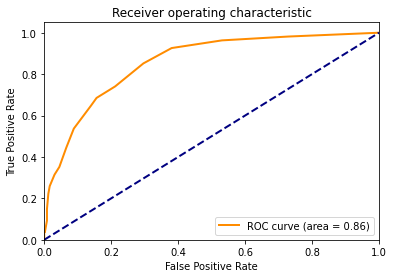

In [323]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Saving

In [353]:
with open('../data_for_plotting/ABCDparent_Hyp2a_y_true_df.npy', 'wb') as f:
    np.save(f, y_true_df)
with open('../data_for_plotting/ABCDparent_Hyp2a_y_cbcl_df.npy', 'wb') as f:
    np.save(f, y_cbcl_df)

In [354]:
# Checking
with open('../data_for_plotting/ABCDparent_Hyp2a_y_true_df.npy', 'rb') as f:
    my_true_df = np.load(f)
with open('../data_for_plotting/ABCDparent_Hyp2a_y_cbcl_df.npy', 'rb') as f:
    my_cbcl_df = np.load(f)

In [355]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(my_true_df, my_cbcl_df)
roc_auc = auc(fpr, tpr)
roc_auc

0.8566910531931109

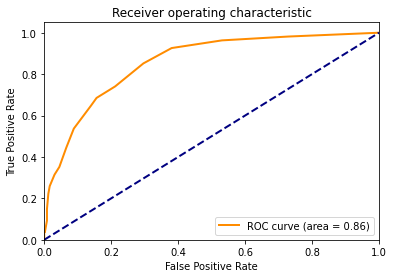

In [356]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Bootstrapping

In [328]:
def gen_auc_boots(scores, truth, nboots=100, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    boot_res = []
    for pp in range(nboots):
        boot_ind = rng.choice(range(len(truth)), size=truth.size, replace=True)
        boot_truth = truth[boot_ind]
        boot_score = scores[boot_ind]
        boot_res.append(roc_auc_score(boot_truth, boot_score))
    return np.array(boot_res)

In [329]:
rng = np.random.default_rng()

if Hypothesis == '2a':
    target_auc = 0.8 # because we defined it this way. Change for Hyp 2b.
elif Hypothesis == '2b':
    target_auc = 0.7

boots = gen_auc_boots(y_cbcl_df, y_true_df, nboots=1000, rng=rng)
boots = np.hstack([boots, np.array([sample_auc_score])])
p_onesided = (boots >= target_auc).mean()
p_onesided

0.984015984015984

In [331]:
p_twosided1 = (boots > target_auc).mean()
p_twosided2 = (boots < target_auc).mean()
p_twosided = min(p_twosided1, p_twosided2)*2
p_twosided

0.03196803196803197

In [332]:
boots

array([0.87486273, 0.85048865, 0.82822821, ..., 0.85465414, 0.86122916,
       0.85669105])

In [333]:
print (min(boots))

0.7647462277091907


In [334]:
p

0.03596403596403597

### Exploratory - flip direction of p estimation

In [335]:
p = (boots < target_auc).mean()
p

0.015984015984015984

# RESULTS

In [336]:
p_onesided = (boots >= target_auc).mean()
p_onesided

0.984015984015984

In [337]:
p_twosided1 = (boots > target_auc).mean()
p_twosided2 = (boots < target_auc).mean()
p_twosided = min(p_twosided1, p_twosided2)*2
p_twosided

0.03196803196803197

In [344]:
min(boots)

0.7647462277091907

In [345]:
max(boots)

0.9275323163888773

In [ ]:
print(np.quantile(boots, .025))
print(np.quantile(boots, .975))
boots_mean_AUCROC = np.mean(boots)
print(boots_mean_AUCROC, '(', np.quantile(boots, .025), np.quantile(boots, .975), ')')

# --- Confusion matrices for optimal thresholds ---

In [346]:
conf_fpr, conf_tpr, conf_thresh = roc_curve(y_true, y_cbcl)
conf_thresh

array([88, 87, 84, 83, 81, 79, 78, 76, 75, 73, 72, 70, 68, 66, 65, 63, 60,
       56, 52, 50])

In [347]:
roc_auc = auc(conf_fpr, conf_tpr)
roc_auc

0.8566910531931109

In [348]:
def predict_y(cbcl, threshold):
    y_score = []
    for item in y_cbcl:
        if item >= threshold:
            y_score.append(1)
        else:
            y_score.append(0)
    return y_score

In [349]:
# Create a dataframe for all data for thresholds and associated fpr, tpr, tp, tn, fp, fn

# and also euclidian distance
# --> tpr - y axis 
# --> fpr - x axis 
# We want to calculate an Euclidian distance to (0,1) for each point on the ROC curve and pick the point where that is minimized. 

## dist = sqrt((x2 - x1)^2 + (y2 - y1)^2) 
## dist = sqrt(square(x2 - x1) + square(y2 - y1)) 

# I will create the df from a list of lists

# first initiate the lists

all_roc_auc = []
all_fpr = []
all_tpr = []
all_tn = []
all_fp = []
all_fn = []
all_tp = []
all_thresholds = []
all_euclidian = []

# Point to calculate the Euclidian distance with - (0, 1)
optimal_performance = np.array((0, 1))

# now iterate through thesholds, calculate the values of interest, update the lists

for threshold in range (51,90):
    # predict diagnoses with the given threshold
    y_score = predict_y(y_cbcl, threshold)
    # calculate fp, fn, tp, tn, aucroc
    tn, fp, fn, tp = confusion_matrix(y_true, y_score).ravel()
    fpr = fp/(fp+tn)
    tpr = tp/(tp+fn)
    # calculate euclidian
    fpr_tpr_datapoint = np.array((fpr, tpr))
    sum_sq = np.sum(np.square(optimal_performance - fpr_tpr_datapoint))
    euclidian = np.sqrt(sum_sq)
    
    # update all lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_tn.append(tn)
    all_fp.append(fp)
    all_fn.append(fn)
    all_tp.append(tp)
    all_thresholds.append(threshold)
    all_euclidian.append(euclidian)


# make a dataframe out of lists

conf_matrices_data = pd.DataFrame(list(zip(all_thresholds, all_euclidian, all_fpr, all_tpr, all_tp, all_tn, all_fp, all_fn)),
               columns =['threshold', 'Euclidian', 'FPR', 'TPR', 'TP', 'TN', 'FP', 'FN'])

conf_matrices_data

,threshold,Euclidian,FPR,TPR,TP,TN,FP,FN
0,51,0.728630,0.728395,0.981481,53,132,354,1
1,52,0.728630,0.728395,0.981481,53,132,354,1
2,53,0.532155,0.530864,0.962963,52,228,258,2
3,54,0.532155,0.530864,0.962963,52,228,258,2
4,55,0.532155,0.530864,0.962963,52,228,258,2
5,56,0.532155,0.530864,0.962963,52,228,258,2
6,57,0.387799,0.380658,0.925926,50,301,185,4
7,58,0.387799,0.380658,0.925926,50,301,185,4
8,59,0.387799,0.380658,0.925926,50,301,185,4
9,60,0.387799,0.380658,0.925926,50,301,185,4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


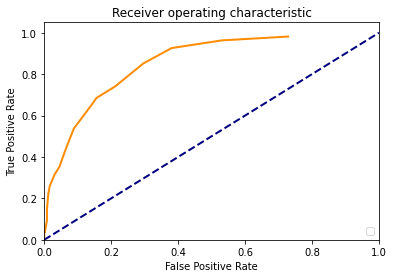

In [350]:
# Just to visualize

plt.figure()
lw = 2 # linewidt
plt.plot(
    all_fpr,
    all_tpr,
    color="darkorange",
    lw=lw,
    #label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [351]:
# Find the best fpr/tpr pair

# What is the min euclidian distance in the dataframe?
conf_matrices_data[['Euclidian']].idxmin()

Euclidian    10
dtype: int64

In [352]:
conf_matrices_data.loc[10]

threshold     61.000000
Euclidian      0.331269
FPR            0.296296
TPR            0.851852
TP            46.000000
TN           342.000000
FP           144.000000
FN             8.000000
Name: 10, dtype: float64